#### Import packages

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

import numpy as np
from numpy import nan
from sklearn import tree

# importing models
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split # Import train_test_split function

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
import seaborn as sns

from numpy import mean
from numpy import std




In [2]:
df = pd.read_csv('Datasets/main_syn_bliss.csv')

In [3]:
df.head(2)

block_id        drug_row   drug_col  cell_line_name  ic50_row  ic50_col  \
0     16145  5-Fluorouracil  Veliparib               1      10.0      10.0   
1     16146  5-Fluorouracil  Veliparib               1      10.0      10.0   

   ri_row  ri_col  css_row  css_col  ...  drug_row_clinical_phase  \
0  19.098  -1.661   23.201   35.158  ...                        4   
1  19.098  -1.661   16.258   30.871  ...                        4   

   drug_col_clinical_phase   MW_row  LogP_row  NumHDonors_row  \
0                        3  130.078   -0.7977             2.0   
1                        3  130.078   -0.7977             2.0   

   NumHAcceptors_row   MW_col  LogP_col  NumHDonors_col  NumHAcceptors_col  
0                2.0  244.298    1.2604             3.0                3.0  
1                2.0  244.298    1.2604             3.0                3.0  

[2 rows x 25 columns]

#### Adding target variable 'synergistic' with 0,1 binary classification values

In [4]:
# we consider synergy values less than 0 as non-synergistic or antagonistic (i.e 0)
# we consider 0 to 10 as intermediate and we neglect those samples
df.loc[df['synergy_bliss']<0,'synergistic'] = 0 #antagonistic
df.loc[df['synergy_bliss']>=10,'synergistic'] = 1 #synergistic

In [5]:
df.synergistic.value_counts()

0.0    3647
1.0     594
Name: synergistic, dtype: int64

In [6]:
df.synergistic

0       0.0
1       0.0
2       NaN
3       NaN
4       0.0
       ... 
7255    NaN
7256    0.0
7257    0.0
7258    0.0
7259    0.0
Name: synergistic, Length: 7260, dtype: float64

In [7]:
df = df.dropna()

In [8]:
df

block_id        drug_row     drug_col  cell_line_name   ic50_row  \
0        16145  5-Fluorouracil    Veliparib               1  10.000000   
1        16146  5-Fluorouracil    Veliparib               1  10.000000   
4        27701  5-Fluorouracil    Veliparib               2   8.055629   
5        27702  5-Fluorouracil    Veliparib               2   8.055629   
7        27704  5-Fluorouracil    Veliparib               2   8.055629   
...        ...             ...          ...             ...        ...   
7253     77958      Vorinostat  891494-63-6               5   2.859269   
7256     89609      Vorinostat  891494-63-6               6   4.000000   
7257     89610      Vorinostat  891494-63-6               6   4.000000   
7258     89611      Vorinostat  891494-63-6               6   4.000000   
7259     89612      Vorinostat  891494-63-6               6   4.000000   

       ic50_col  ri_row  ri_col  css_row  css_col  ...  \
0     10.000000  19.098  -1.661   23.201   35.158  ...   
1     10.000000  19.098  -1.661   16.258   30.871  ...   
4      3.896132  22.529   5.580   29.098   41.526  ...   
5      3.896132  22.529   5.580   24.654   38.375  ...   
7      3.896132  22.529   5.580   28.687   40.587  ...   
...         ...     ...     ...      ...      ...  ...   
7253   4.000000  13.175  -6.161   33.067   51.646  ...   
7256   0.407414  21.778  17.418   29.868   90.481  ...   
7257   0.407414  21.778  17.418   24.650   84.304  ...   
7258   0.407414  21.778  17.418   23.352   89.954  ...   
7259   0.407414  21.778  17.418   20.568   86.596  ...   

      drug_col_clinical_phase   MW_row  LogP_row  NumHDonors_row  \
0                           3  130.078   -0.7977             2.0   
1                           3  130.078   -0.7977             2.0   
4                           3  130.078   -0.7977             2.0   
5                           3  130.078   -0.7977             2.0   
7                           3  130.078   -0.7977             2.0   
...                       ...      ...       ...             ...   
7253                        2  264.325    2.4711             3.0   
7256                        2  264.325    2.4711             3.0   
7257                        2  264.325    2.4711             3.0   
7258                        2  264.325    2.4711             3.0   
7259                        2  264.325    2.4711             3.0   

      NumHAcceptors_row   MW_col  LogP_col  NumHDonors_col  NumHAcceptors_col  \
0                   2.0  244.298    1.2604             3.0                3.0   
1                   2.0  244.298    1.2604             3.0                3.0   
4                   2.0  244.298    1.2604             3.0                3.0   
5                   2.0  244.298    1.2604             3.0                3.0   
7                   2.0  244.298    1.2604             3.0                3.0   
...                 ...      ...       ...             ...                ...   
7253                3.0  376.262    1.9415             2.0                7.0   
7256                3.0  376.262    1.9415             2.0                7.0   
7257                3.0  376.262    1.9415             2.0                7.0   
7258                3.0  376.262    1.9415             2.0                7.0   
7259                3.0  376.262    1.9415             2.0                7.0   

      synergistic  
0             0.0  
1             0.0  
4             0.0  
5             0.0  
7             0.0  
...           ...  
7253          0.0  
7256          0.0  
7257          0.0  
7258          0.0  
7259          0.0  

[4241 rows x 26 columns]

#### Plotting number of synergistic and number of antagonistic rows

Text(0, 0.5, 'Count')

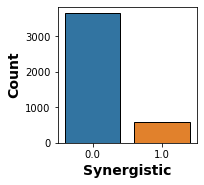

In [9]:
plt.figure(figsize=(2.5, 2.5))

sns.countplot(x='synergistic', data=df, edgecolor='black')

plt.xlabel('Synergistic', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# plt.savefig('synergistic counts.png')

### Applying ML model

In [10]:
df.columns

Index(['block_id', 'drug_row', 'drug_col', 'cell_line_name', 'ic50_row',
       'ic50_col', 'ri_row', 'ri_col', 'css_row', 'css_col', 'css_ri', 'S_sum',
       'S_mean', 'S_max', 'synergy_bliss', 'drug_row_clinical_phase',
       'drug_col_clinical_phase', 'MW_row', 'LogP_row', 'NumHDonors_row',
       'NumHAcceptors_row', 'MW_col', 'LogP_col', 'NumHDonors_col',
       'NumHAcceptors_col', 'synergistic'],
      dtype='object')

In [11]:
# define features and target variable
features = ['cell_line_name','MW_row', 'LogP_row', 'NumHDonors_row','NumHAcceptors_row', 'MW_col', 'LogP_col','NumHDonors_col', 'NumHAcceptors_col']
target = ['synergistic']
print(len(features))


9


In [12]:
X = df[features]
y = df[target]


In [13]:
# splitting the data with 75-25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

#### Model 1) XGBoost

Accuracy: 0.9481743227326266
F1 Score: 0.8439716312056739
Cross val Accuracy: 0.646 (0.071)


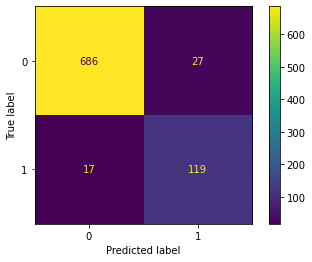

In [82]:
# XGB

clf = XGBClassifier(max_depth= 15, min_child_weight= 3, scale_pos_weight= 6, use_label_encoder=False,eval_metric = 'error')


clf.fit(X_train, y_train.values.ravel())

y_pred = clf.predict(X_test)
# Calculating Accuracy and f1 score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
# Cross validation
scores = cross_val_score(clf, X, y.values.ravel(), scoring='f1_macro')
print('Cross val Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
# Defining the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
# Visual representation
cm_xgb = confusion_matrix(y_test, y_pred)
fig = ConfusionMatrixDisplay(cm_xgb).plot()


#### Model 2 Random Forest

Accuracy: 0.944640753828033
F1 Score: 0.8185328185328187
Cross val Accuracy: 0.595 (0.068)


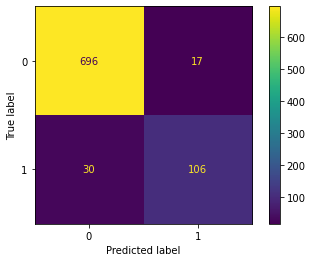

In [28]:
# RF
rf = RandomForestClassifier(n_estimators=100,random_state=7)

rf.fit(X_train, y_train.values.ravel())

y_pred_rf = rf.predict(X_test)


y_pred_rf

# Calculating Accuracy and f1 score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("F1 Score:",f1_score(y_test, y_pred_rf))

# Cross validation
scores_rf = cross_val_score(rf, X, y.values.ravel(), scoring='f1_macro')
scores_rf

print('Cross val Accuracy: %.3f (%.3f)' % (mean(scores_rf), std(scores_rf)))

# Visual representation

cm_rf = confusion_matrix(y_test, y_pred_rf)

cm_rf_display = ConfusionMatrixDisplay(cm_rf).plot()

#### Model 3) Decision Tree Classifier

Accuracy: 0.944640753828033
F1 Score: 0.8185328185328187
Cross val Accuracy: 0.599 (0.075)


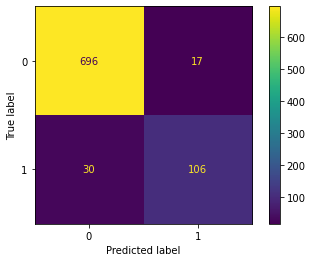

In [29]:
# DecisionTree

clf_dt = DecisionTreeClassifier(random_state=7)

clf_dt.fit(X_train, y_train.values.ravel())

y_pred_dt = rf.predict(X_test)


y_pred_dt

# Calculating Accuracy and f1 score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("F1 Score:",f1_score(y_test, y_pred_dt))

# Cross validation
scores_dt = cross_val_score(clf_dt, X, y.values.ravel(), scoring='f1_macro')
scores_dt

print('Cross val Accuracy: %.3f (%.3f)' % (mean(scores_dt), std(scores_dt)))

# Visual representation

cm_dt = confusion_matrix(y_test, y_pred_dt)

cm_dt_display = ConfusionMatrixDisplay(cm_dt).plot()

#### Model 4) Gradient Boosting

Accuracy: 0.911660777385159
F1 Score: 0.669603524229075
Cross val Accuracy: 0.616 (0.058)


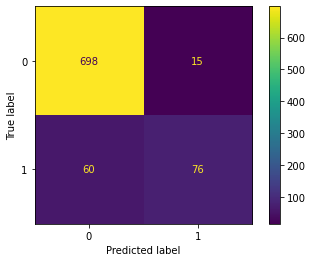

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(random_state=7, n_estimators=100).fit(X,y.values.ravel())
y_pred_gbc = gbc_clf.predict(X_test)

y_pred_gbc

# Calculating Accuracy and f1 score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbc))
print("F1 Score:",f1_score(y_test, y_pred_gbc))

# Cross validation
scores_gbc = cross_val_score(gbc_clf, X, y.values.ravel(), scoring='f1_macro')
scores_gbc

print('Cross val Accuracy: %.3f (%.3f)' % (mean(scores_gbc), std(scores_gbc)))

# Visual representation

cm_gbc = confusion_matrix(y_test, y_pred_gbc)

cm_gbc_display = ConfusionMatrixDisplay(cm_gbc).plot()

## Hyper-parameter tuning

### Grid search cv

In [69]:
param_grid = {
    "max_depth": range(2,20,1),
    "min_child_weight": range(2,20,1),
    "scale_pos_weight": range(2,20,1)
}
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=7,
    use_label_encoder=False,
    eval_metric = 'error'
)

# param_grid = {
#     "max_depth": range(10,20,1),
#     "min_child_weight": range(5,15,1),
#     "scale_pos_weight": range(10,20,1)
# }
# estimator = XGBClassifier(
#     objective= 'binary:logistic',
#     nthread=4,
#     seed=7,
#     use_label_encoder=False,
#     eval_metric = 'error'
# )

In [70]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring = 'f1_macro',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

In [71]:
grid_search.fit(X, y.values.ravel())


Fitting 5 folds for each of 5832 candidates, totalling 29160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='error', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monoto...
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                  

In [72]:
grid_search.best_params_

{'max_depth': 15, 'min_child_weight': 3, 'scale_pos_weight': 6}

In [73]:
grid_search.best_score_

0.6455525809970023